#                                        ✈️ Flight Price Prediction

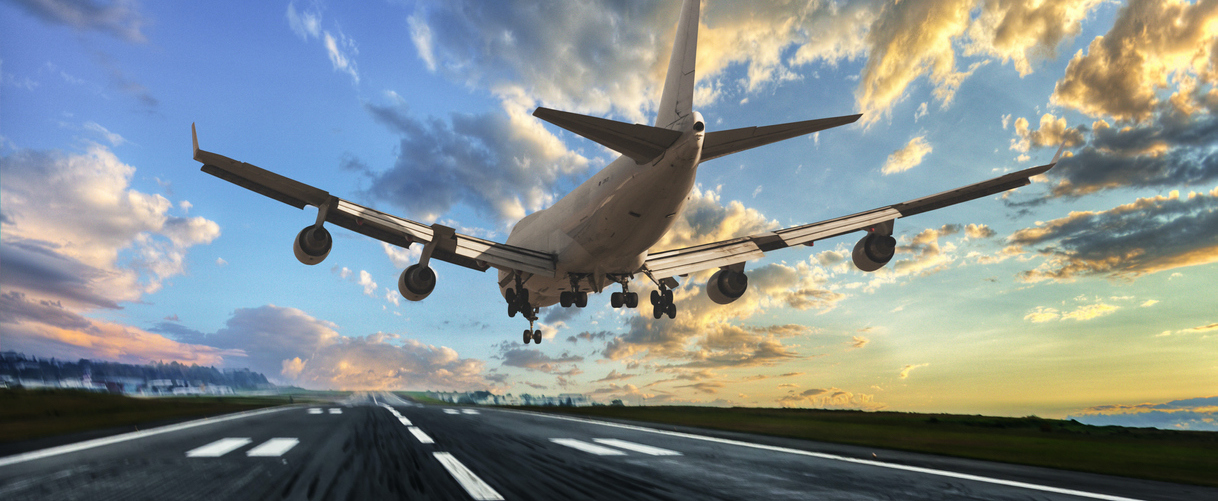

**********#The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

#===================To boost learning, try to create an end-to-end project using the dataset.==================================****

1-hiegh companey of travels and flight price
2-most flight useed in the airlines 
3-most airlines used in economy class and out comes
4-most airlines used in business class and out comes
3-source city and distenision compiention
4-most city used in the airlines and prices of them
5- the airline and flight is used
6-type of flight is used in the long and short distance
7-high  5 flights are used in the airlines and prices of them
8-number of flights
Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

#  1-  ✈️| Exploratory Data Analysis

In [23]:
###import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv', sep=',',encoding='windows-1252')
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [24]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [25]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#  2-  ✈️| visualizations


 ****-most flight useed in the airlines**

In [27]:
data['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [28]:
len(data['flight'].value_counts())

1561

****- Top 7 source city and the distenision by price**

 

In [29]:
x= data.groupby(['source_city','destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending = False)
x[0:7]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591


> **high  5 flights are used in the airlines and prices of them

In [30]:
n=data.groupby(['flight','airline'])['price'].count().reset_index().sort_values(["price"], ascending = False)
n[0:5]

,flight,airline,price
1442,UK-706,Vistara,3235
1454,UK-772,Vistara,2741
1445,UK-720,Vistara,2650
1490,UK-836,Vistara,2542
1477,UK-822,Vistara,2468


> **TOP 5 FLIGHTS AND AIRLINES BASED ON PRICE**

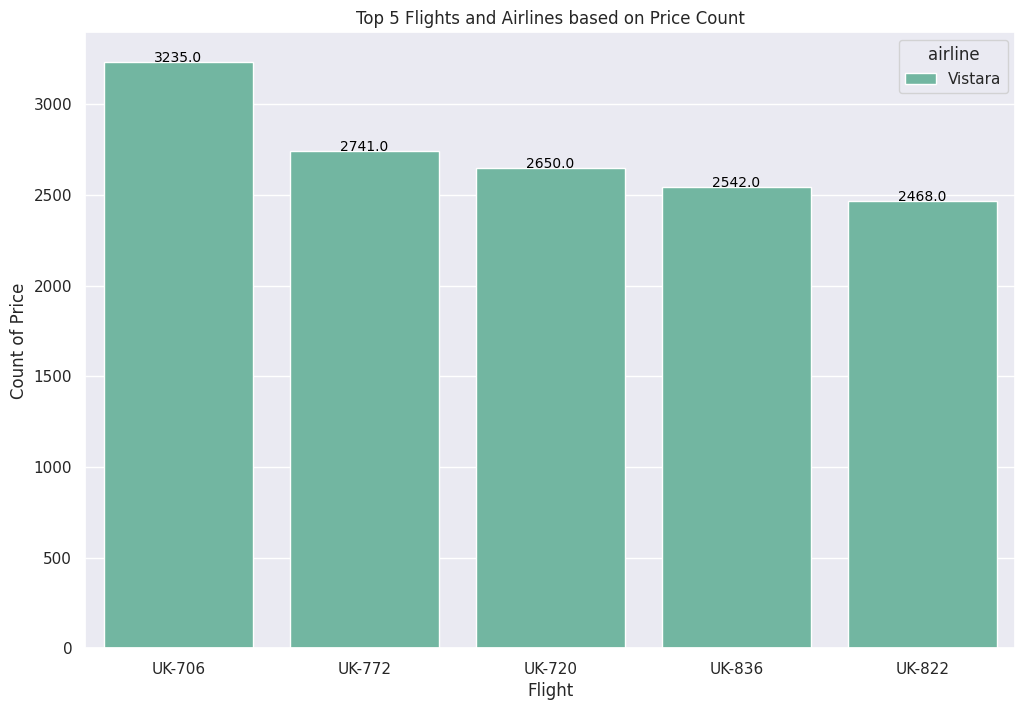

In [31]:
n = data.groupby(['flight', 'airline'])['price'].count().reset_index().sort_values(["price"], ascending=False)
top_5_flights = n.head(5)

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(top_5_flights))
ax = sns.barplot(x='flight', y='price', hue='airline', data=top_5_flights, palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Flight')
plt.ylabel('Count of Price')
plt.title('Top 5 Flights and Airlines based on Price Count')
plt.show()


> <div class="alert alert-block alert-success">
<b>Finding:</b> MOST Flight Useed IS UK-706 and most flights used is Vstara airlines
    
</div>

In [32]:
eco=data[data['class']=='Economy']


In [33]:
eco['airline'].value_counts()

airline
Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: count, dtype: int64

> **3-What is the most airline used in economy class and who has the most outcomes**

Text(0.5, 1.0, 'distibution of most airliens in economy class')

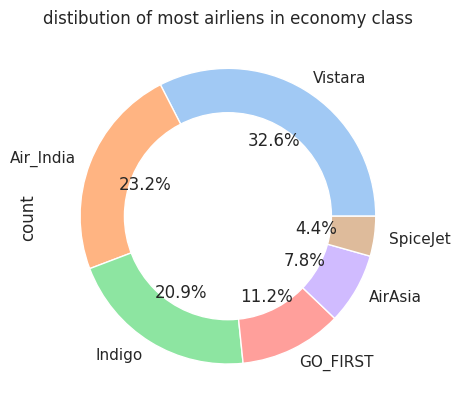

In [34]:
colors = sns.color_palette('pastel')
eco['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('distibution of most airliens in economy class')


In [35]:
n=eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price',ascending=False)
n

,airline,price
5,Vistara,525173099
1,Air_India,351012862
3,Indigo,229580207
2,GO_FIRST,130973972
0,AirAsia,65858089
4,SpiceJet,55681482


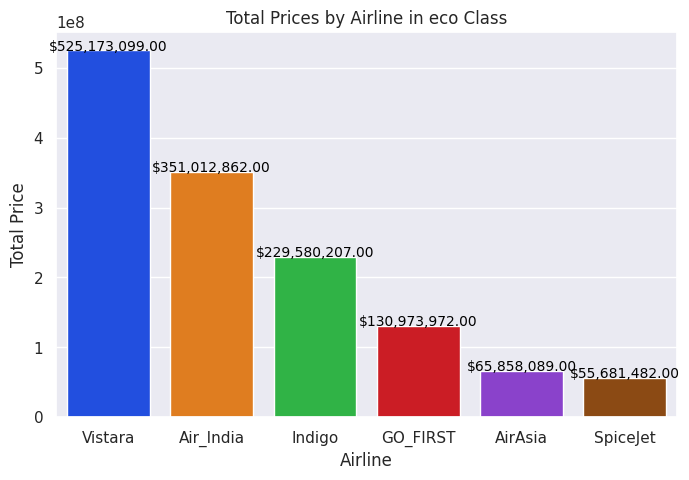

In [36]:
n = eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
plt.figure(figsize=(8, 5))
colors = sns.color_palette('bright', len(n))
ax = sns.barplot(x='airline', y='price', data=n, palette=colors)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Airline')
plt.ylabel('Total Price')
plt.title('Total Prices by Airline in eco Class')

plt.show()


> **Which city is most used in economic tickets?**

Text(0.5, 1.0, 'distrbution of source city in eco class')

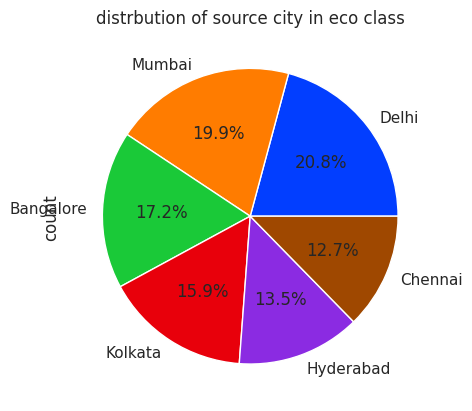

In [37]:
eco['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors)
plt.title('distrbution of source city in eco class')

> <div class="alert alert-block alert-success">
<b>Finding:</b> 1- The Most used Airline Also Achieves the Highest Profit is Vistara and next is Airindia
and 2- Most city use econimic class is Delhi and after that is Mumbai
</div>

> ****most airlines used in business class and out comes**

In [38]:
bus = data[data['class']=='Business']

<Axes: ylabel='count'>

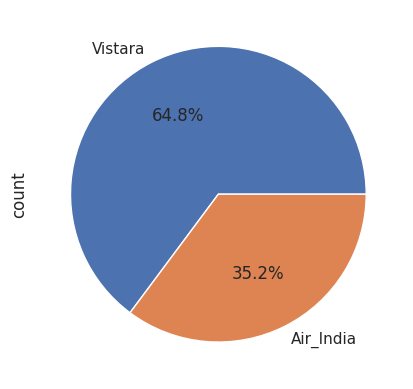

In [39]:
colors = sns.color_palette('deep')
bus['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

In [40]:
m=bus.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
m

,airline,price
1,Vistara,3361297636
0,Air_India,1550516928


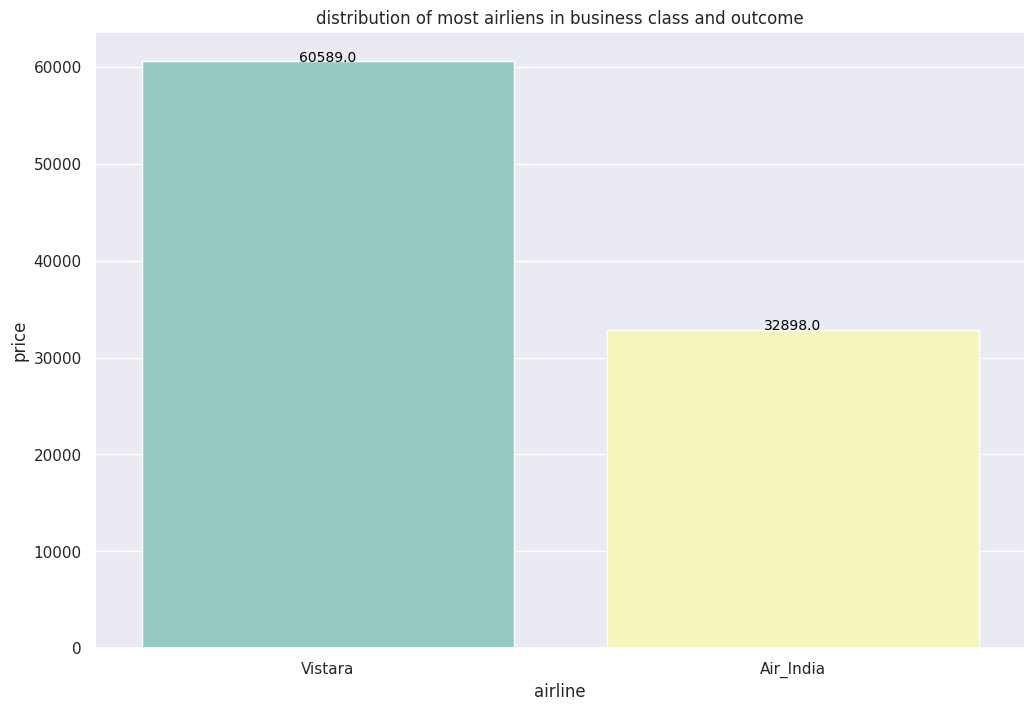

In [41]:
colors_count = bus['airline'].value_counts()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', len(colors_count))
ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('airline')
plt.ylabel('price')
plt.title('distribution of most airliens in business class and outcome')

plt.show()


In [42]:
bus.groupby(['airline'])['price'].mean().reset_index().sort_values(by='price', ascending=False)

,airline,price
1,Vistara,55477.027777
0,Air_India,47131.039212


Text(0.5, 1.0, 'distribution of cities used business class tickiets')

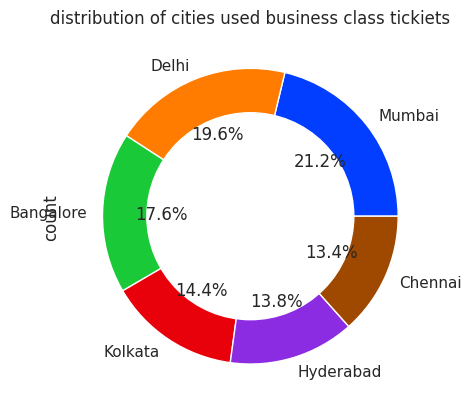

In [43]:
colors = sns.color_palette('bright')
bus['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('distribution of cities used business class tickiets')

> <div class="alert alert-block alert-success">
<b>Finding:</b> There are Only Two Companies that have the Business Class and the Common Used and Have Most outcomes is Vistara 
and Most city Use Business class is Mumbai and after that is Delhi
</div>

> **~Does price vary with Airlines?**

In [44]:
df =data.groupby(['airline'])['price'].median()
df

airline
AirAsia       3276.0
Air_India    11520.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64

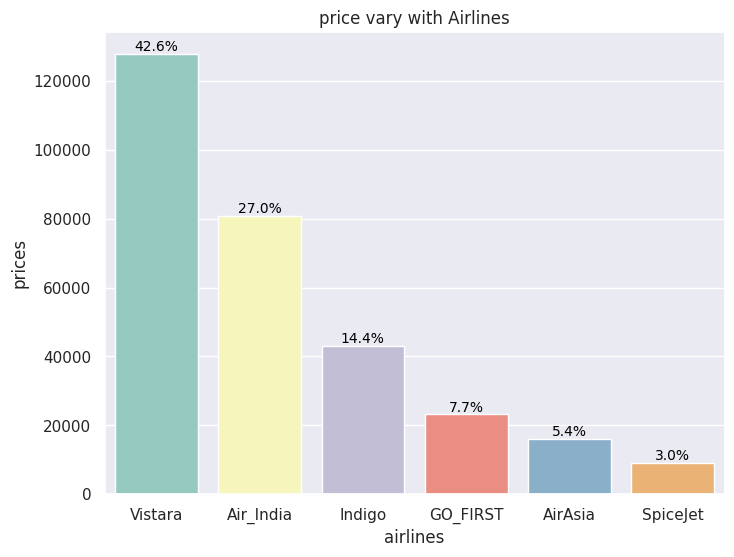

In [45]:
dm = data['airline'].value_counts()
total_customers = len(data)

percentages = dm / total_customers * 100

# Choose a different color palette from Seaborn
colors = sns.color_palette('Set3', n_colors=len(dm))

plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm, palette=colors)

for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.title('price vary with Airlines')
plt.xlabel('airlines')
plt.ylabel('prices')

plt.show()

> **How does the ticket price vary between Economy and Business class?**

<Axes: title={'center': 'vary between class'}, ylabel='price'>

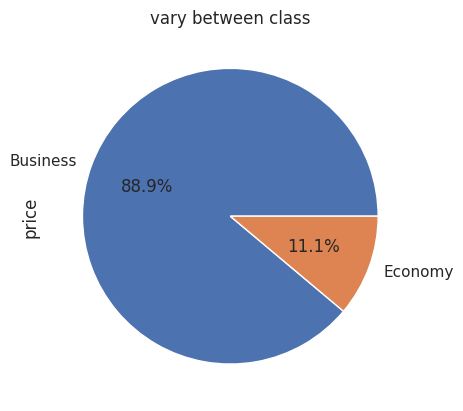

In [46]:
data.groupby(['class'])['price'].mean().plot(kind='pie',title='vary between class',autopct = "%1.1f%%")

> <div class="alert alert-block alert-info">
<b> ~vary between classes Business 52540 to 6572 economy by 88.9 to 11.1 percentage 
  and vary between arrival time and departure time and duration of flight.</div>

> **Does ticket price change based on the departure time and arrival time?**

Text(0.5, 1.0, 'airline prices based on Arrival Time')

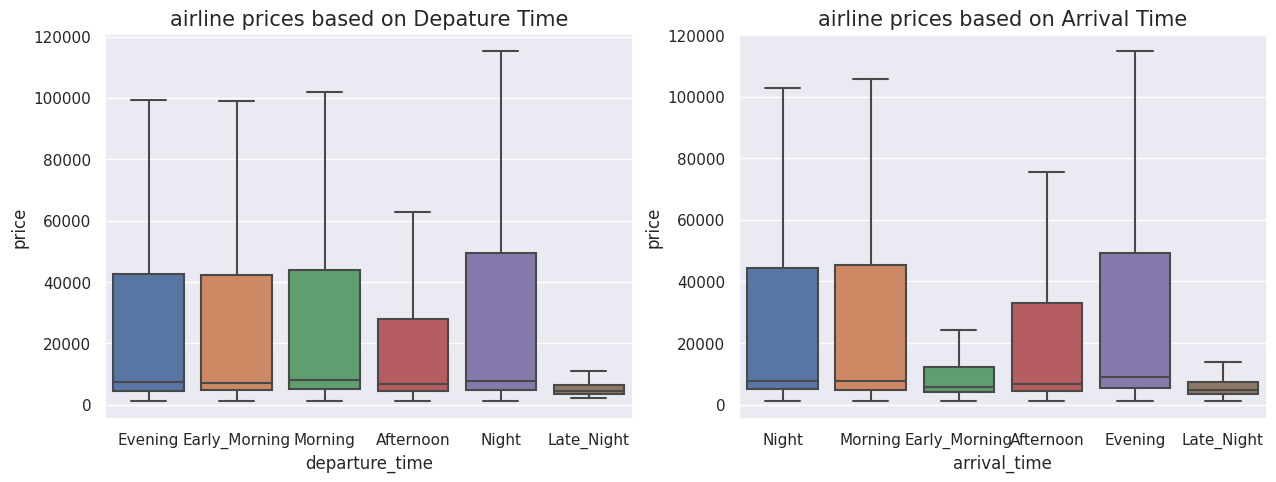

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='departure_time',y='price',showfliers=False).set_title('airline prices based on Depature Time',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data,x='arrival_time',y ='price',showfliers=False).set_title('airline prices based on Arrival Time',fontsize=15)

> <div class="alert alert-block alert-success">
<b>Finding:</b> 1- The Most Popular Time of Deaptuee Is Morning And Least Popular Time Is Late_Night
and
> **</b>2- The Most Popular Time of Arrival Is Evening And Least Popular Time Is Late_Night
</div>


> **How the price changes with change in Source and Destination?**

Text(0.5, 0.98, 'price vary with source and destination city')

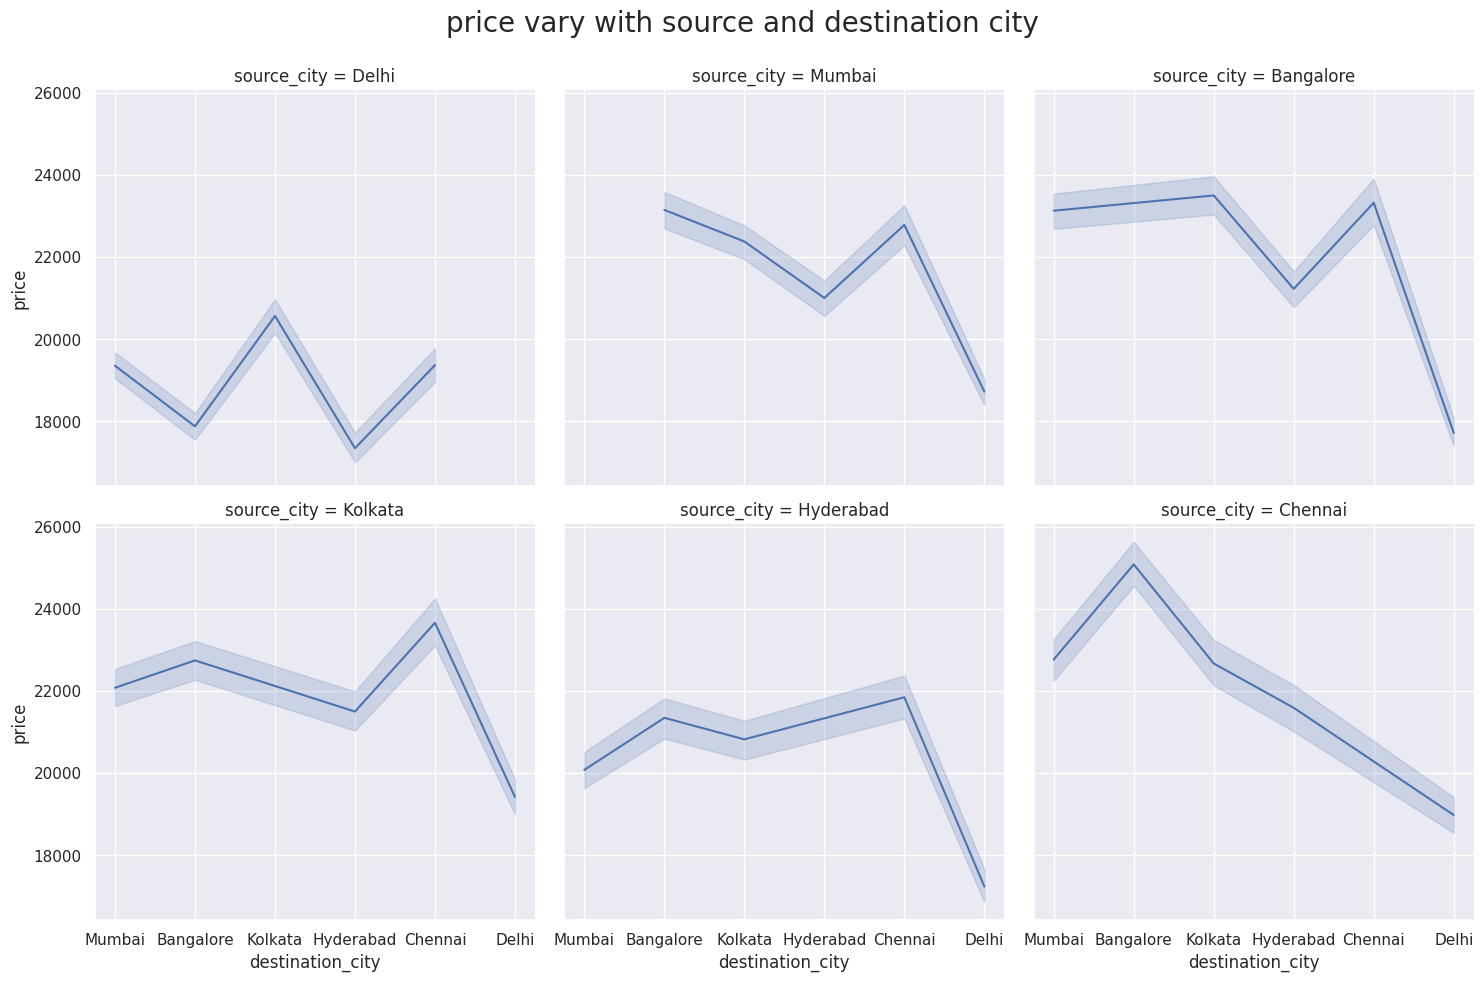

In [48]:
mx = sns.relplot(col ='source_city',y='price',kind = 'line',x='destination_city',data=data,col_wrap=3 )
mx.fig.subplots_adjust(top=0.9)
mx.fig.suptitle('price vary with source and destination city', fontsize=20)

> <div class="alert alert-block alert-success">
<b>Finding:</b> From this graph,it implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Bangalore are the high priced..
</div>

> **How does the ticket price vary between Economy and Business class?**

Text(0.5, 1.0, 'airlines based on Business')

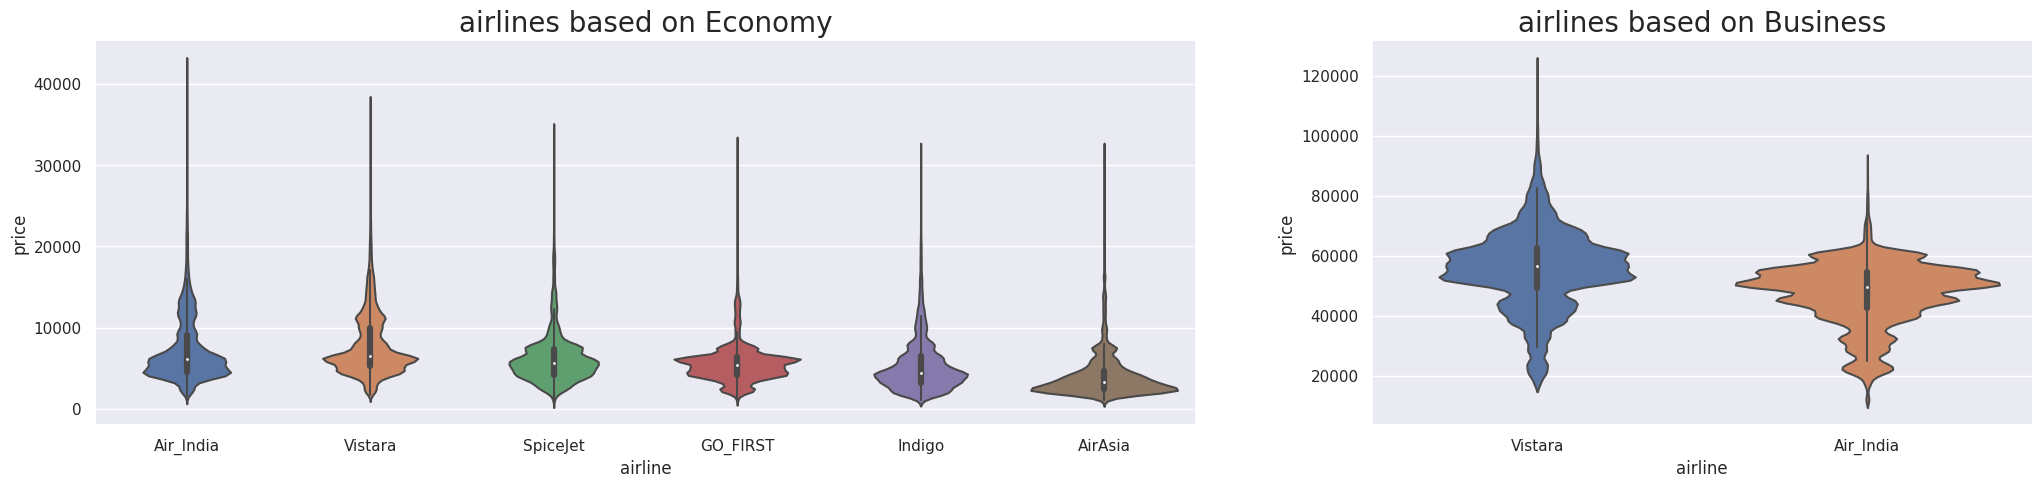

In [49]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(x='airline',y='price',data=data.loc[data['class']=='Economy'].sort_values(by='price',ascending=False),kind='boxen',ax=axs[0])
axs[0].set_title('airlines based on Economy',fontsize=20)
sns.violinplot(x='airline',y = 'price',data=data.loc[data['class']=='Business'].sort_values(by ='price',ascending = False),kind='boxen',ax=axs[1])
axs[1].set_title('airlines based on Business',fontsize=20)


> <div class="alert alert-block alert-success">
<b>Finding:</b> 
Among the airlines, Air India and Vistara is having the most expensive flight tickets, whereas AirAsia provides the most affordable fares. Specifically, in the context of business class, Vistara's prices are the highest in comparison to AirAsia. .

> **How does the ticket price vary with the number of stops of a Flight?**

<Axes: ylabel='count'>

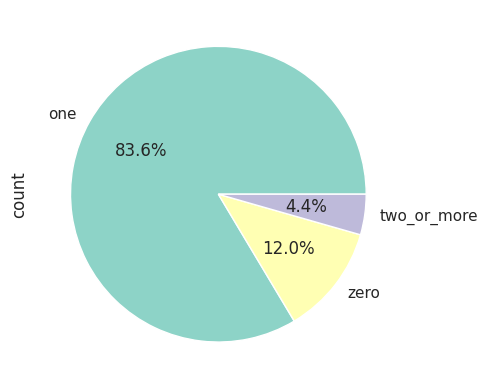

In [50]:
data['stops'].value_counts().plot(kind='pie',autopct = "%1.1f%%",colors = colors)

<Axes: xlabel='airline', ylabel='price'>

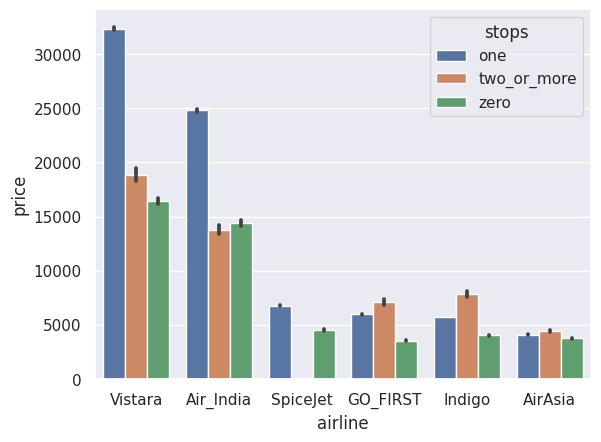

In [51]:
sns.barplot(y = "price", x = "airline",hue="stops",data = data .sort_values("price", ascending = False))

> <div class="alert alert-block alert-info">
<b>Finding One Stop Flight is Most Used in Airlines by 83.6 Percentage And Most air lines used one stop is Vistiria and Air_India : .</div>

In [52]:
df=data.copy()

In [53]:
data['source_to_destionation']=data['source_city']+' to '+data['destination_city']
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


In [54]:
data.groupby(['source_to_destionation','airline'])['price'].size().reset_index().sort_values(by='price',ascending=False)

,source_to_destionation,airline,price
89,Delhi to Mumbai,Vistara,5840
165,Mumbai to Delhi,Vistara,5812
11,Bangalore to Delhi,Vistara,5423
29,Bangalore to Mumbai,Vistara,5380
65,Delhi to Bangalore,Vistara,5379
...,...,...,...
46,Chennai to Hyderabad,SpiceJet,51
44,Chennai to Hyderabad,GO_FIRST,38
97,Hyderabad to Chennai,GO_FIRST,38
16,Bangalore to Hyderabad,SpiceJet,31


> **what the mean price and duration of flight with source city to destination city**

In [55]:
m=data.groupby(['source_to_destionation'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
m[0:5]

,source_to_destionation,price
5,Chennai to Bangalore,25081.850454
21,Kolkata to Chennai,23660.361040
3,Bangalore to Kolkata,23500.061229
0,Bangalore to Chennai,23321.850078
25,Mumbai to Bangalore,23147.873807


**numbers of stops in each travel**

<Figure size 640x480 with 0 Axes>

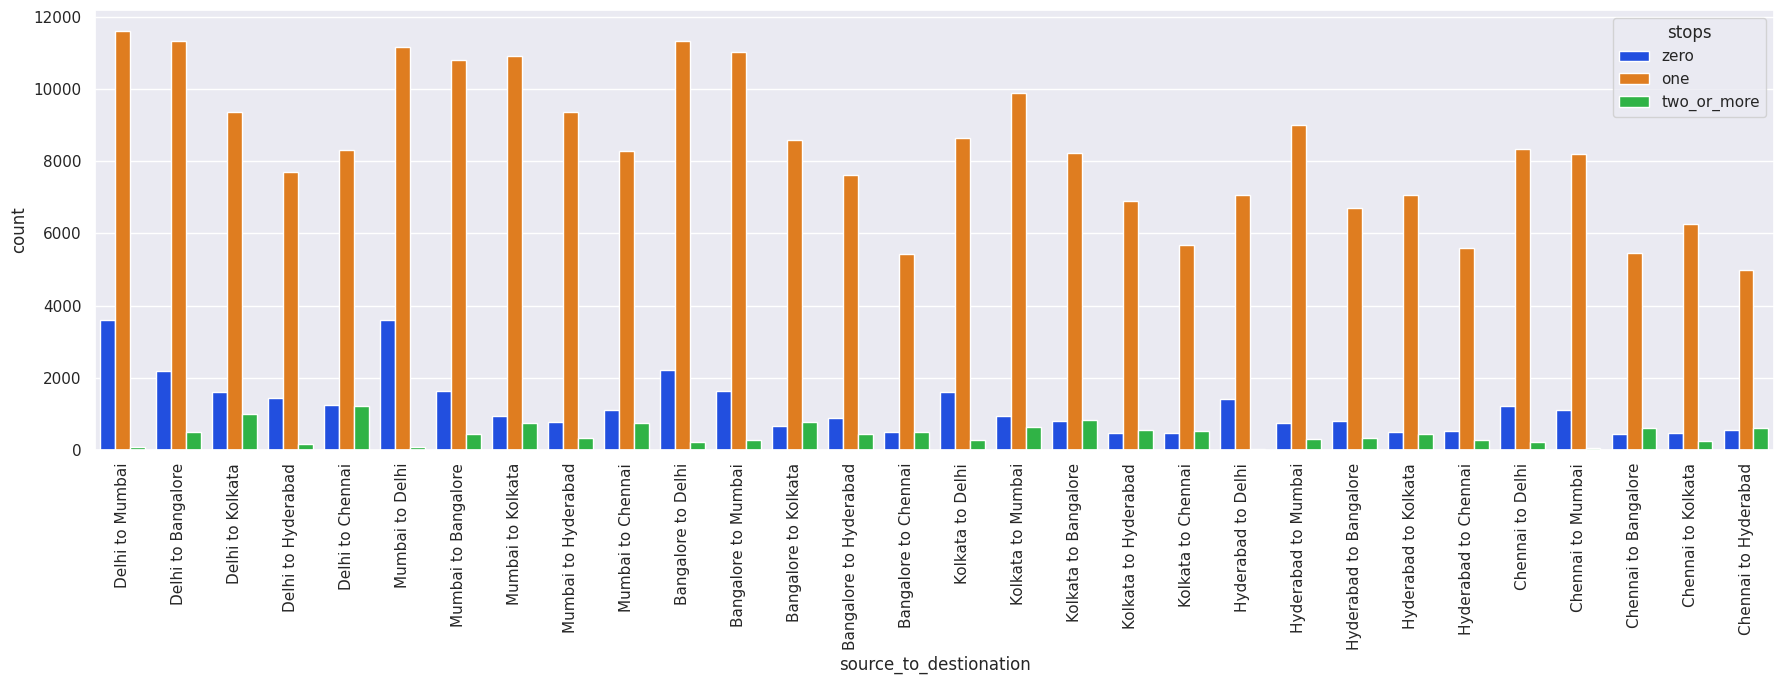

In [56]:
colors=sns.color_palette('bright')
plt.clf()
plt.figure(figsize=(18,7))
sns.countplot(x='source_to_destionation',hue='stops',data=data,palette=colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [57]:
dn =data.groupby(['days_left'])['price'].mean()


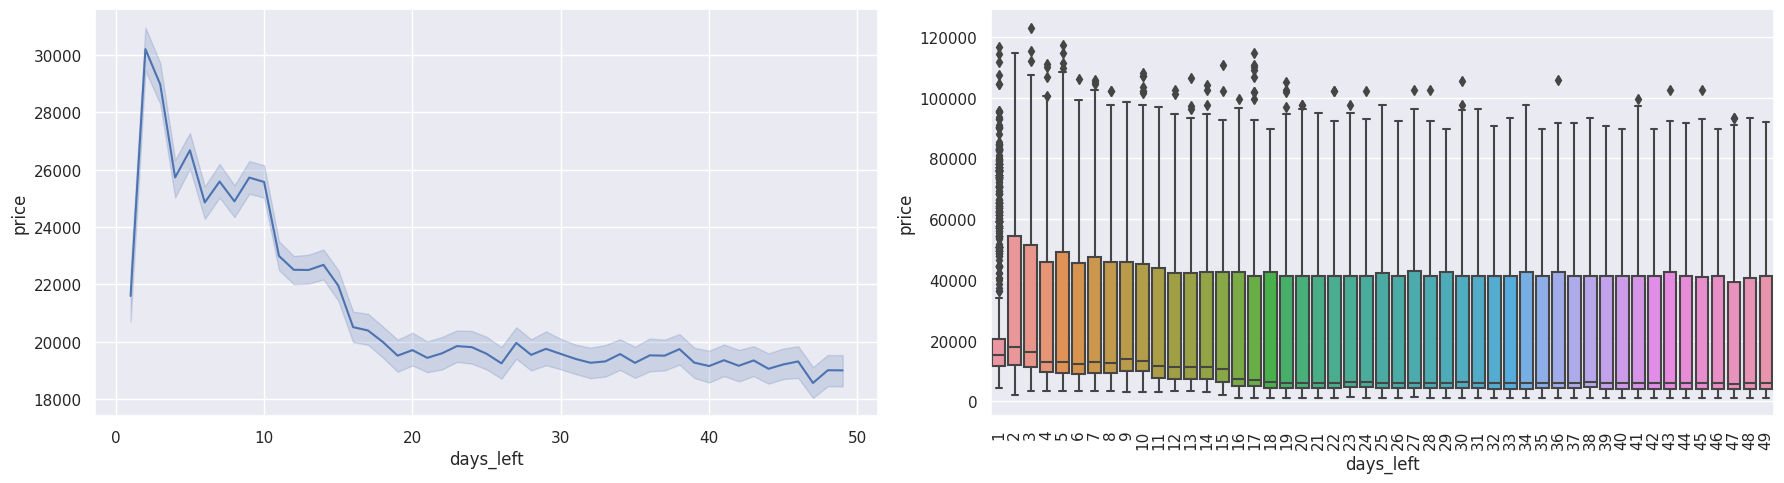

In [58]:
fig,axs = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
sns.lineplot(x= 'days_left' ,y='price',data=data,ax=axs[0])
sns.boxplot(y='price',x='days_left',data=data,ax=axs[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> <div class="alert alert-block alert-success">
<b>Finding:</b>  The graph illustrates a gradual increase in prices until 20 days before the flight, followed by a significant drop just one day prior, resulting in prices up to three times cheaper. This pattern suggests that airlines may reduce ticket prices close to the departure date to fill empty seats and ensure high occupancy on their planes..
</div>

In [59]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [60]:
def offer(x):
    if x['days_left']==1:
        return ("5%offer")
    elif x['days_left']>=2 and x['days_left']<=8:
        return('7%offer')
    elif x['days_left']>8 and x['days_left']>=15:
        return('10%offer')
    else:
        return('no offer')
    
data['offer']=data.apply(offer,axis=1)     

<Axes: ylabel='count'>

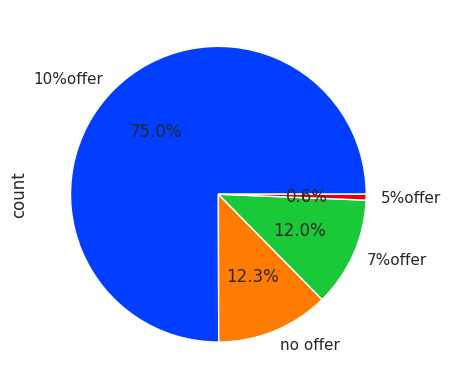

In [61]:
data['offer'].value_counts().plot(kind='pie',autopct = "%1.1f%%",colors = colors)

> <div class="alert alert-block alert-info">
<b>Based on the analysis, most flights on the first day are booked. Therefore, some airlines have raised ticket prices on that day, and the flights that were not filled on that day have a reduction in their ticket prices, so we do not need to reduce the price further. </div>

In [62]:
city_count=dict(data['source_city'].value_counts())
city_count

{'Delhi': 61343,
 'Mumbai': 60896,
 'Bangalore': 52061,
 'Kolkata': 46347,
 'Hyderabad': 40806,
 'Chennai': 38700}

In [63]:
def offer_city(count):
    if  count>=60000:
        return('offer5%')
    if   45000 <= count < 60000:
         return('offer7%')
    if   30000<= count <45000:
        return('offer10%')
    else:
        return('no offer')
data['offer_city']=data['source_city'].map(city_count).apply(offer_city)    

> <div class="alert alert-block alert-info">
<b>In the cities that have a large number of flights, we will give a good discount in order to target more travelers, and in the cities that have fewer flights, we will give a bigger discount in order to target more people.. </div>

In [64]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation,offer,offer_city
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,5%offer,offer5%
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,5%offer,offer5%
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,5%offer,offer5%
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,5%offer,offer5%
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,5%offer,offer5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,10%offer,offer10%
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,10%offer,offer10%
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,10%offer,offer10%
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,10%offer,offer10%


#  3-  ✈️| PREPROCESSING

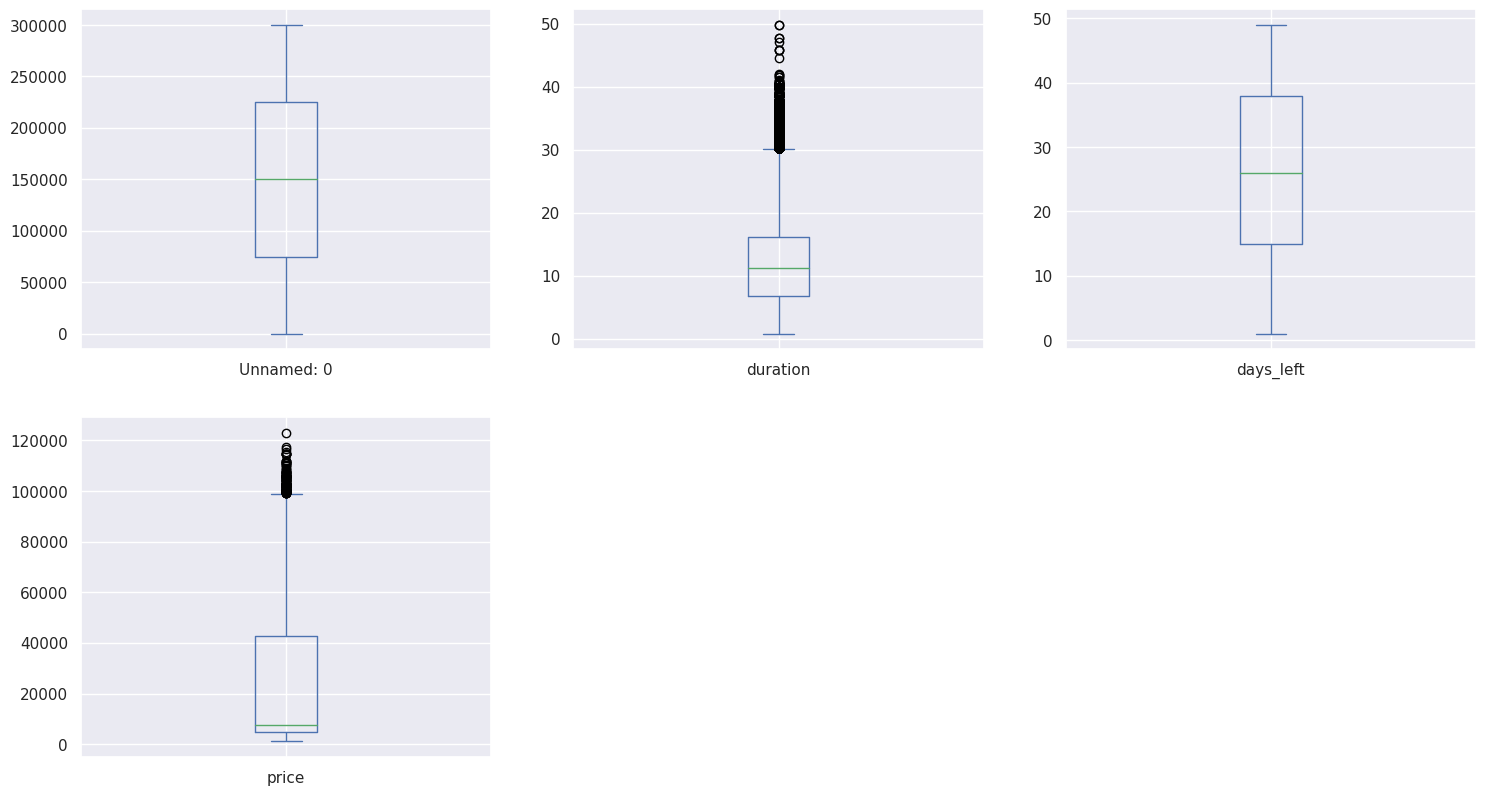

In [65]:
data.plot(kind='box',subplots = True,layout=(3,3),figsize=(18,15))
plt.show()

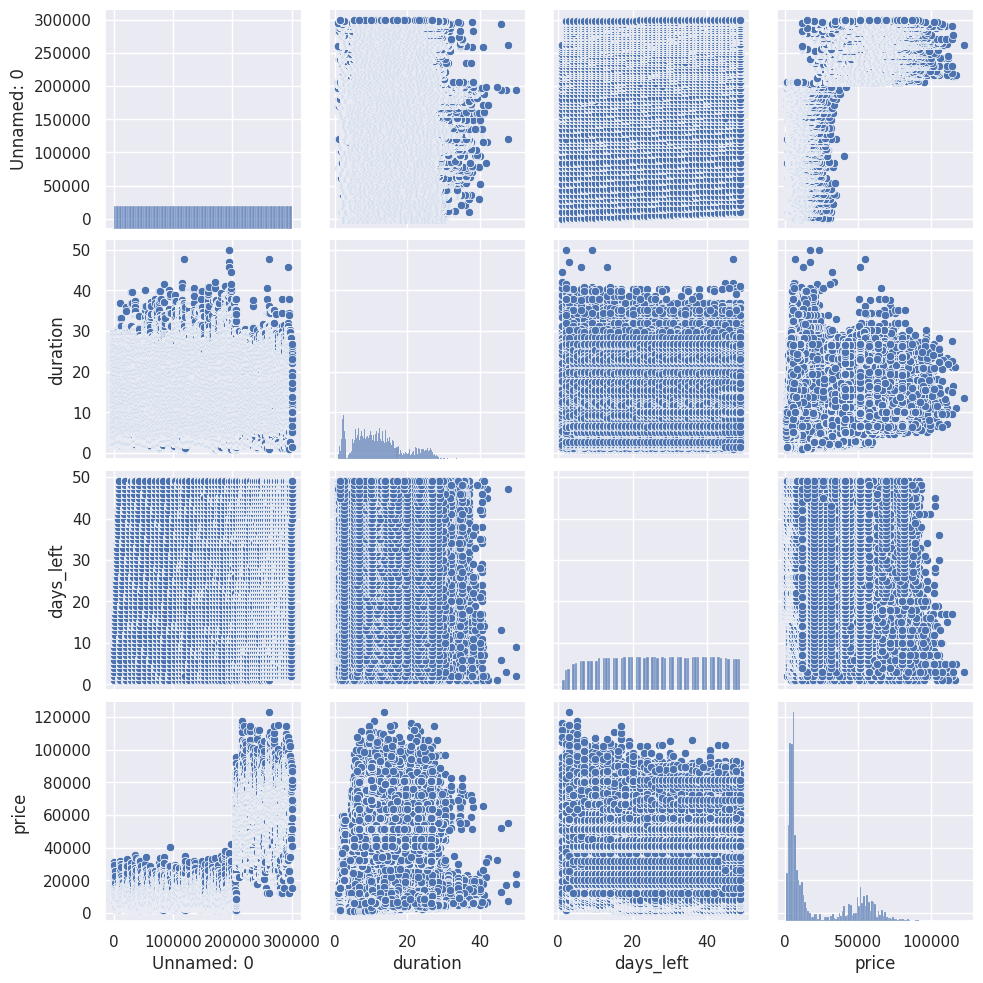

In [66]:
sns.pairplot(df)

In [67]:
#preprocessing

In [68]:
#Encoding

In [69]:
duplicated=data.duplicated()
duplicated.sum()

0

In [70]:
df.describe(include='object')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [71]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
airline = LabelEncoder()
stops=LabelEncoder()
clas=LabelEncoder()

In [73]:
df['airline']=airline.fit_transform(df['airline'])
df['source_city']=airline.fit_transform(df['source_city'])
df['destination_city']=airline.fit_transform(df['destination_city'])
df['departure_time']=airline.fit_transform(df['departure_time'])
df['arrival_time']=airline.fit_transform(df['arrival_time'])
df['stops']=stops.fit_transform(df['stops'])
df['class']=clas.fit_transform(df['class'])


In [74]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['flight'],axis=1,inplace=True)

In [75]:
df['airline'].value_counts()

airline
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: count, dtype: int64

In [76]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


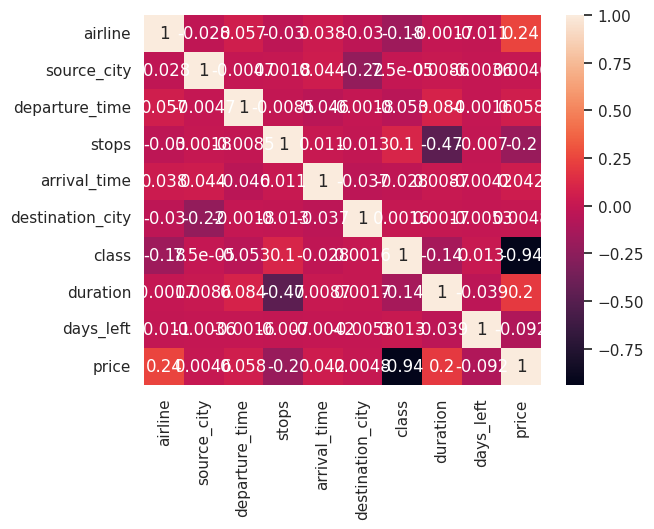

<Figure size 2000x2000 with 0 Axes>

In [77]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [78]:
df.mean()

airline                 3.104873
source_city             2.577592
departure_time          2.417337
stops                   0.284168
arrival_time            3.074086
destination_city        2.588303
class                   0.688536
duration               12.221021
days_left              26.004751
price               20889.660523
dtype: float64

In [79]:
x_temp = df.drop(['price'],axis=1).values
y=df.price.values


In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming x_temp is a NumPy array
scaler = MinMaxScaler().fit_transform(x_temp)
X = pd.DataFrame(scaler)



In [81]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
0,0.000000,0.620975,0.366653,0.600000,1.000000
1,0.000000,0.515518,0.350352,0.400000,1.000000
2,0.000000,0.483467,0.350855,0.400000,1.000000
3,0.000000,0.142084,0.332912,0.000000,1.000000
4,0.000000,0.614817,0.348333,0.800000,1.000000
5,0.000000,0.517661,0.348909,0.600000,1.000000
6,0.000000,0.688536,0.463093,1.000000,1.000000
7,0.000000,0.232470,0.146775,0.212653,1.000000
8,0.000000,0.520932,0.282521,0.520833,1.000000


#  4-  ✈️| MODELING

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [84]:
X_train.shape

(210107, 9)

In [85]:
y_test.shape

(90046,)

In [86]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
LR = linear_model.LinearRegression()

LR.fit(X_train,y_train)
print('train score',LR.score(X_train,y_train))
print('test score',LR.score(X_test,y_test))
y_pred = LR.predict(X_test)
R2_LR=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_LR=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_LR=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_LR=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

train score 0.9045877099195366
test score 0.9046540517018563
r2 score 0.9046540517018563
MAE 4626.099183664042
MSE 49071365.664414555
MAPR 0.437523716821856


> <div class="alert alert-block alert-danger">
<b>Warning:</b> Based On accuracy, Train and Test Scores The Model not Linear Regression.
</div>

In [87]:
LR.intercept_

50524.710548725474

In [88]:
LR.coef_

array([  4777.2263023 ,    530.48142678,    181.38323297,  -6570.89070518,
          935.96472881,    608.00391719, -44561.64987871,   4576.69954021,
        -6318.61762484])

In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [90]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
print('train score',xgb.score(X_train,y_train))
print('test score',xgb.score(X_test,y_test))
y_pred = xgb.predict(X_test)
R2_XGB=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_XGB=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_XGB=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_XGB=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

train score 0.9775295914981297
test score 0.9756817530708662
r2 score 0.9756817530708662
MAE 2024.3674256574905
MSE 12515787.075141866
MAPR 0.14918720231129848


In [91]:
pred1=pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
pred1

,y_test,y_pred
0,7366,5600.156738
1,64831,68778.031250
2,6195,6072.108398
3,60160,55867.441406
4,6578,5848.159180
...,...,...
90041,6134,5524.955078
90042,67004,69480.187500
90043,2410,2579.774902
90044,2835,4207.061035


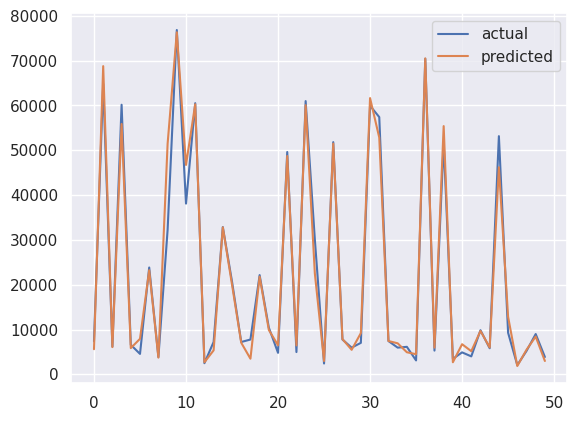

In [92]:
plt.plot(pred1[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=9)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Accuracy of train model:',rf_model.score(X_train, y_train))
print('accuracy of test model',rf_model.score(X_test,y_test))
R2_RF=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_RF=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_RF=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_RF=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

Accuracy of train model: 0.964453379547811
accuracy of test model 0.963028971284788
r2 score 0.963028971284788
MAE 2444.7143569172263
MSE 19027750.014093254
MAPR 0.16740624246965424


In [94]:
pred2=pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
pred2

,y_test,y_pred
0,7366,5289.423408
1,64831,65546.675673
2,6195,6701.141462
3,60160,54462.493086
4,6578,5289.423408
...,...,...
90041,6134,4986.016391
90042,67004,67155.942116
90043,2410,3047.587220
90044,2835,4047.702588


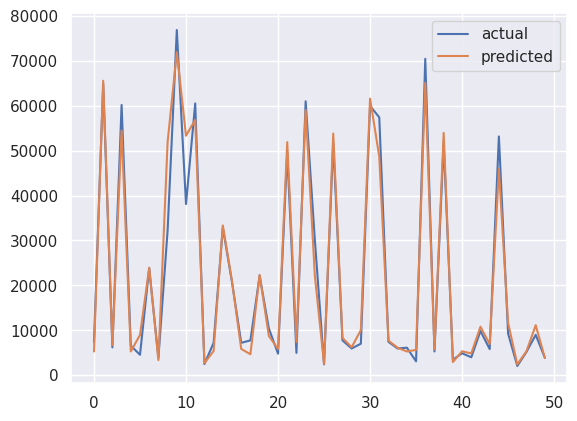

In [95]:
plt.plot(pred2[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [96]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor  

Rtree = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10, max_features=9, random_state=42)
Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)
print('Accuracy of train model:',Rtree.score(X_train, y_train))
print('accuracy of test model',Rtree.score(X_test,y_test))
R2_DT=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_DT=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_DT=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_DT=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))



Accuracy of train model: 0.9616423646350241
accuracy of test model 0.9599060841581157
r2 score 0.9599060841581157
MAE 2542.718573265893
MSE 20634995.40686484
MAPR 0.1721664724583241


In [97]:
pred3=pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
pred3

,y_test,y_pred
0,7366,5290.063807
1,64831,65476.448905
2,6195,6656.118237
3,60160,54465.312967
4,6578,5290.063807
...,...,...
90041,6134,4376.842259
90042,67004,67511.474880
90043,2410,3158.062237
90044,2835,4103.197222


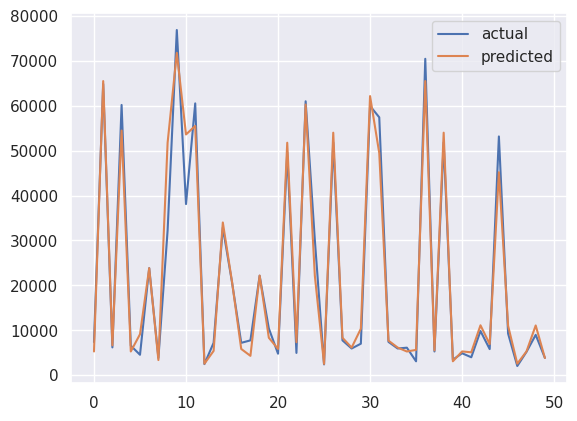

In [98]:
plt.plot(pred3[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [99]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(X_train)
est = sm.OLS(y_train,x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.213e+05
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        01:07:24   Log-Likelihood:            -2.1587e+06
No. Observations:              210107   AIC:                         4.317e+06
Df Residuals:                  210097   BIC:                         4.318e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.052e+04     79.161    638.253      0.0

In [100]:
# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor","XGBRegressor"]
MSE = [MSE_LR, MSE_DT, MSE_RF,MSE_XGB]
MAPR = [MAPR_LR, MAPR_DT, MAPR_RF,MAPR_XGB]
MAE = [MAE_LR, MAE_DT, MAE_RF,MAE_XGB]
R2 = [R2_LR, R2_DT, R2_RF,R2_XGB]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'MAPR': MAPR,
    'MAE': MAE,
    'R2 Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAPR'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R2 Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

,Model,MSE,MAPR,MAE,R2 Squared
Model no.,,,,,
1,Linear Regression,49071365.664415,0.437524,4626.099184,0.904654
2,Decision Tree Regressor,20634995.406865,0.172166,2542.718573,0.959906
3,Random Forest Regressor,19027750.014093,0.167406,2444.714357,0.963029
4,XGBRegressor,12515787.075142,0.149187,2024.367426,0.975682
